<p style="text-align:center">
PSY 394U <b>Data Analytics with Python</b>, Spring 2019


<img style="width: 700px; padding: 0px;" src="https://github.com/sathayas/JupyterAnalyticsSpring2019/blob/master/Images/Banner.png?raw=true" alt="title pics"/>

</p>

<p style="text-align:center; font-size:40px; margin-bottom: 30px;"><b> Text classification </b></p>

<p style="text-align:center; font-size:18px; margin-bottom: 32px;"><b>April 30 - May 2, 2019</b></p>

<hr style="height:5px;border:none" />

Text data can be analyzed by classification and clustering algorithms. This can be done by extracting features from a text data corpus, and performing a classification or clustering according to the extracted features and the target category data. Here, we cover a few simple examples of text classification and clustering. 

# 1. String classification
<hr style="height:1px;border:none" />

The goal here is to classify which strings belong to which category. To do so, we will use the corpus **`name`**, a collection of female and male names on NLTK, and construct a classifier to determine whether a name is of a female or a male.

`<NameClassifier.py>`

In [3]:
import nltk
import random

# reading names from the names corpus
from nltk.corpus import names
femaleNames = names.words('female.txt')
maleNames = names.words('male.txt')

In [4]:
femaleNames[:10]

['Abagael',
 'Abagail',
 'Abbe',
 'Abbey',
 'Abbi',
 'Abbie',
 'Abby',
 'Abigael',
 'Abigail',
 'Abigale']

In [5]:
maleNames[:10]

['Aamir',
 'Aaron',
 'Abbey',
 'Abbie',
 'Abbot',
 'Abbott',
 'Abby',
 'Abdel',
 'Abdul',
 'Abdulkarim']

Here, we are reading in names of females and males. 

In [12]:
# creating name-label pairs, then shuffling
nameData = []
for iName in femaleNames:
    nameData.append((iName, 'female'))
for iName in maleNames:
    nameData.append((iName, 'male'))

Once both data are read, we combine the name with its category ('female' or 'male') as tuples. Then we shuffle the data so that male and female names are now mixed.

In [13]:
random.shuffle(nameData)

In [14]:
nameData[:10]

[('Aldric', 'male'),
 ('Ardyce', 'female'),
 ('Tynan', 'male'),
 ('Donna', 'female'),
 ('Nessy', 'female'),
 ('Aggi', 'female'),
 ('Mellissa', 'female'),
 ('Ileane', 'female'),
 ('Cristina', 'female'),
 ('Rayner', 'male')]

To extract a feature from the shuffled data file, we will use a custom function called **`gender_feature`**. This function takes a string, then returns a feature (in this example, the last letter).

In [15]:
# a function to return a feature to classify whether a name is
# male or female.
# The feature and the label are returned together
def gender_feature(name):
    featureDict = {'last-letter': name[-1]}
    return featureDict

Then we convert the list of names (**`nameData`**) into a list of features (**`last-letter`**). Again, we shall keep both the feature dictionary and the label in **`featureData`**.

In [17]:
# converting the name data into feature (i.e., just the last letter)
# as well as the label (female / male)
featureData = [(gender_feature(n), gender) for (n, gender) in nameData]

In [18]:
featureData[:10]

[({'last-letter': 'c'}, 'male'),
 ({'last-letter': 'e'}, 'female'),
 ({'last-letter': 'n'}, 'male'),
 ({'last-letter': 'a'}, 'female'),
 ({'last-letter': 'y'}, 'female'),
 ({'last-letter': 'i'}, 'female'),
 ({'last-letter': 'a'}, 'female'),
 ({'last-letter': 'e'}, 'female'),
 ({'last-letter': 'a'}, 'female'),
 ({'last-letter': 'r'}, 'male')]

At this point, we are generating training and testing data sets, with the testing data set comprising 1000 observations, and the training data comprising the rest.

In [19]:
# spliting into training and testing data sets
trainData, testData = featureData[1000:], featureData[:1000]

Then we train a classifier. Here, we use a naive Bayes algorithm. A naive Bayes classifier classifies observations as the most likely outcomes based on the Bayes theory (i.e., the distribution of the label given the observed feature(s)). Naive Bayes classifiers are widely used in text classification, such as spam detection and sentiment analysis. The naive Bayes classifier is available in NLTK as **`NaiveBayesClassifier`**. This classifier object is somewhat different from that of **Scikit-learn** (a.k.a., `sklearn`). We supply both feature(s) and category label to the naive Bayes algorithm. 

In [20]:
# training a classifier (Naive Bayes)
clf = nltk.NaiveBayesClassifier.train(trainData)

Now the classifier has been trained. Let's see how well it works.

In [21]:
# classification example
print(clf.classify(gender_feature('Nemo')))

male


In [22]:
print(clf.classify(gender_feature('Dory')))

female


Now, we shall see how the classifier performs on our testing data.

In [23]:
# classifier performance on the testing data
print(nltk.classify.accuracy(clf, testData))

0.757


This is actually a good performance in terms of accuracy. Unlike classifiers in `sklearn`, the naive Bayes classifier in NLTK lets you examine the most informative features.

In [24]:
# most informative features
clf.show_most_informative_features(10)

Most Informative Features
             last-letter = 'a'            female : male   =     34.4 : 1.0
             last-letter = 'k'              male : female =     29.0 : 1.0
             last-letter = 'f'              male : female =     15.4 : 1.0
             last-letter = 'p'              male : female =     11.3 : 1.0
             last-letter = 'd'              male : female =     10.1 : 1.0
             last-letter = 'o'              male : female =      9.5 : 1.0
             last-letter = 'v'              male : female =      8.5 : 1.0
             last-letter = 'w'              male : female =      8.0 : 1.0
             last-letter = 'm'              male : female =      7.9 : 1.0
             last-letter = 'r'              male : female =      7.3 : 1.0


So, it seems like a name ending with "a" is likely classified as a female name.

How can we improve the performance of the classifier? Let's examine misclassified cases and see if there is any pattern.

In [ ]:
# examining classification errors
errorData = []
testDataFull = nameData[:1000]  # Extracting the full testing data
for iData in testDataFull:
    trueCat = iData[1]
    predCat = clf.classify(gender_feature(iData[0]))
    if predCat != trueCat:
        errorData.append((trueCat, predCat, iData[0]))


# printing out the errors
for (y_true, y_pred, name) in sorted(errorData):
    print('Truth: %-6s\t' % y_true, end='')
    print('Pred: %-6s\t' % y_pred, end='')
    print('Name: %-12s' % name)

(I will not print out all the misclassified cases)

Notice that there are some patterns. For example,
```
...
Truth: female	Pred: male  	Name: Catlin      
...
Truth: female	Pred: male  	Name: Christin    
...
Truth: female	Pred: male  	Name: Dyann       
Truth: female	Pred: male  	Name: Emlynn      
...
Truth: female	Pred: male  	Name: Jacquelin   
...
Truth: female	Pred: male  	Name: Joann       
Truth: female	Pred: male  	Name: Joycelin    
...
Truth: female	Pred: male  	Name: Kerstin     
...
```
Notice that some misclassified female names end with "in" and "nn." Moreover,
```
...
Truth: male  	Pred: female	Name: Artie       
...
Truth: male  	Pred: female	Name: Benjie      
...
Truth: male  	Pred: female	Name: Bobbie      
...
Truth: male  	Pred: female	Name: Eddie       
...
Truth: male  	Pred: female	Name: Ricky       
Truth: male  	Pred: female	Name: Rocky       
...
Truth: male  	Pred: female	Name: Sparky      
...
Truth: male  	Pred: female	Name: Tucky       
...
```
Some misclassified male names end with "ie" and "ky". So, in addition to the last letter, we can use the last two letters as another feature to improve the classification performance.

`<NameClassifierRevised.py>`

In [26]:
# a function to return a feature to classify whether a name is
# male or female.
# The feature and the label are returned together
def gender_feature(name):
    featureDict = {'last-letter': name[-1], 'last2': name[-2:]}
    return featureDict

Now there are two features in the feature dictionary: **`last-letter`** and **`last2`**. Let's use these features and re-classify the name data.

In [27]:
# converting the name data into features 
# as well as the label (female / male)
featureData = [(gender_feature(n), gender) for (n, gender) in nameData]

In [28]:
featureData[:10]

[({'last-letter': 'c', 'last2': 'ic'}, 'male'),
 ({'last-letter': 'e', 'last2': 'ce'}, 'female'),
 ({'last-letter': 'n', 'last2': 'an'}, 'male'),
 ({'last-letter': 'a', 'last2': 'na'}, 'female'),
 ({'last-letter': 'y', 'last2': 'sy'}, 'female'),
 ({'last-letter': 'i', 'last2': 'gi'}, 'female'),
 ({'last-letter': 'a', 'last2': 'sa'}, 'female'),
 ({'last-letter': 'e', 'last2': 'ne'}, 'female'),
 ({'last-letter': 'a', 'last2': 'na'}, 'female'),
 ({'last-letter': 'r', 'last2': 'er'}, 'male')]

In [29]:
# spliting into training and testing data sets
trainData, testData = featureData[1000:], featureData[:1000]

# training a classifier (Naive Bayes)
clf = nltk.NaiveBayesClassifier.train(trainData)

# classifier performance on the testing data
print(nltk.classify.accuracy(clf, testData))

0.765


As you can see, there is some improvement in the performance. Here are most informative features.

In [30]:
# most informative features
clf.show_most_informative_features(15)

Most Informative Features
                   last2 = 'na'           female : male   =    153.6 : 1.0
                   last2 = 'la'           female : male   =     70.3 : 1.0
                   last2 = 'ia'           female : male   =     38.0 : 1.0
             last-letter = 'a'            female : male   =     34.4 : 1.0
                   last2 = 'sa'           female : male   =     32.1 : 1.0
                   last2 = 'rt'             male : female =     31.8 : 1.0
                   last2 = 'rd'             male : female =     29.9 : 1.0
             last-letter = 'k'              male : female =     29.0 : 1.0
                   last2 = 'us'             male : female =     26.1 : 1.0
                   last2 = 'io'             male : female =     25.1 : 1.0
                   last2 = 'ra'           female : male   =     23.8 : 1.0
                   last2 = 'ta'           female : male   =     23.2 : 1.0
                   last2 = 'do'             male : female =     22.9 : 1.0

As you can see, the majority of informative features are the last two letters.

### Exercise
1. **Last 3 letters**. Revise the code above by adding an additional feature, the last 3 letters. Then re-run the classifier. Print out 15 most informative features.

# 2. Document classification
<hr style="height:1px;border:none" />

# Document classification with NLTK
In addition to classification of string data, you can also classify documents using NLTK. Such document classification is often done by using a **bag-of-words** approach. A bag-of-words is a list of words used in a document. Here, we ignore word order or any grammatical structure. We solely focus on which words are used in a document, and with a sufficient number of documents in a corpus, we can build a classifier to categorize a document. 

In this example, we will use the **`movie-reviews`** corpus from NLTK, one of the example corpora we have been using. This type of classification can be used in a **sentiment analysis**, to infer the sentiment of the writer (positive or negative, in this particular case).

`<DocClassify.py>`

In [32]:
import nltk
import random
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.svm import LinearSVC

First, we read documents in the corpus, and create a list of document-label pair. 

In [33]:
# creating a list of document-label pairs
from nltk.corpus import movie_reviews as mr
reviewList = []
for iCat in mr.categories():  # first, going over categories (pos or neg)
    for iReview in mr.fileids([iCat]):   # reviews in that category
        reviewPair = (mr.words(iReview), iCat)
        reviewList.append(reviewPair)

Since the reviews are grouped by categories (pos or neg), so we shuffle them first, then split them into the testing (500 reviews) and training (all the rest) data sets. Next, we create a list of 2000 most frequently appearing words in the training data.

In [34]:
# shuffling, and separating into testing and training data sets
random.shuffle(reviewList)
trainList, testList = reviewList[500:], reviewList[:500]

In [36]:
trainList[:5]

[(['my', 'filmcritic', '.', 'com', 'colleague', 'norm', ...], 'pos'),
 (['one', 'of', 'the', 'contributors', 'to', 'the', ...], 'neg'),
 (['in', 'the', 'past', ',', 'tim', 'burton', 'has', ...], 'neg'),
 (['close', 'your', 'eyes', 'for', 'a', 'moment', ',', ...], 'pos'),
 (['hollywood', 'has', 'a', '.', '750', 'batting', ...], 'pos')]

In [37]:
# creating a list of all words in the training data set
allWords = []
for iReviewPair in trainList:
    reviewWords = [w.lower() for w in iReviewPair[0]]
    # Just in case someone writes a review IN ALL CAPS
    allWords += reviewWords


# word frequency, and just consider 2000 most frequent words
allWordFreq = nltk.FreqDist(allWords)
featureWords = [w for (w,c) in allWordFreq.most_common(2000)]

Here, the most frequently used words are punctuations and stop words. But since there are so many words in the feature word list, we do not worry about those. At this point, we define a function to extract a bag-of-words from each document.

In [38]:
# Document features (whether contains certain words)
def document_features(document): 
    document_words = set(document) 
    features = {}
    for w in featureWords:
        features['contains({})'.format(w)] = (w in document_words)
    return features

This function returns a dictionary of features, whether each of the 2000 words is contained in the document. We use this function to extract features from each document in the training and testing data sets.

In [39]:
# extracting features for training and testing data
trainSet = [(document_features(d), c) for (d,c) in trainList]
testSet = [(document_features(d), c) for (d,c) in testList]

Each entry in the training and testing data set is a dictionary of features, i.e., whether a certain word is contained in the document, as well as the target class ('pos' or 'neg').
```
({'contains(surprise)': False,
  'contains(version)': False,
  'contains(lady)': False,
  'contains(constantly)': False,
  'contains(minute)': True,
  'contains(sheer)': False,
  'contains(memorable)': False,
  'contains(hospital)': False,
  'contains(himself)': False,
  ...},
 'pos')
```

Now, we are ready to run the naive Bayes classifier. *Please note that it may take a few minutes to run the classifier*.

In [40]:
# classifier
clf = nltk.NaiveBayesClassifier.train(trainSet)
print(nltk.classify.accuracy(clf, testSet)) 

0.802


As you can see, the classifier did a fairly good job in classifying the review sentiment. The most informative features are:

In [41]:
# most informative features
clf.show_most_informative_features(15)

Most Informative Features
        contains(seagal) = True              neg : pos    =      7.0 : 1.0
   contains(wonderfully) = True              pos : neg    =      6.2 : 1.0
           contains(era) = True              pos : neg    =      5.9 : 1.0
         contains(awful) = True              neg : pos    =      5.9 : 1.0
    contains(ridiculous) = True              neg : pos    =      5.8 : 1.0
         contains(mulan) = True              pos : neg    =      5.7 : 1.0
         contains(damon) = True              pos : neg    =      5.4 : 1.0
         contains(waste) = True              neg : pos    =      5.3 : 1.0
        contains(poorly) = True              neg : pos    =      5.2 : 1.0
          contains(lame) = True              neg : pos    =      5.1 : 1.0
       contains(unfunny) = True              neg : pos    =      5.0 : 1.0
         contains(worst) = True              neg : pos    =      5.0 : 1.0
         contains(bland) = True              neg : pos    =      4.8 : 1.0

## Using a classifier from `sklearn` in NLTK

Besides the naive Bayes classifier, you can also use a classifier available in `sklearn` in NLTK. This is done by a *wrapper* available in NLTK. A wrapper is a function that calls one function from another function.  So, let's say we want to use a support vector machine (SVM) from `sklearn`. In that case, we need to import **`SklearnClassifier`** from **`nltk.classify.scikitlearn`**, a wrapper utility enabling a use of `sklearn` classifier in NLTK. In addition, we also need to import the SVM classifier in `sklearn`. We will use **`LinearSVC`**, a SVM with a linear kernel. 

In [42]:
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.svm import LinearSVC

Now we are ready to use a linear SVM for our movie review data.

In [43]:
# Now with SVM classifier (linear kernel)
clf_svm = SklearnClassifier(LinearSVC())
clf_svm.train(trainSet)
print(nltk.classify.accuracy(clf_svm, testSet)) 

0.812


Note that, since this is a classifier from `sklearn`, not from NLTK, so it does not let you print out most informative features.

### Exercise
1. **Reviewer sentiment, same or different?**. The program **`SentimentClassify.py`** (available on GitHub) classifies user reviews on Amazon.com as positive (1) or negative (0), using the naive Bayes classifier in NLTK. You want to see if the classifier for the reviewer sentiment for Amazon works on reviews from other platforms. In the directory **`SentimentReviews`** (available on GitHub) are labeled reviews from IMDB (**`imdb_labelled.txt`**) and Yelp (**`yelp_labelled.txt`**). Chose either one of the review corpora, and classify the reviews using the classifier from `SentimentClassify.py` based on Amazon reviews (trained on the training set only). Calculate the classification accuracy.
2. **Sanity check**. Modify the program **`SentimentClassify.py`** so that it can construct a classifier based on the review corpus you chose for the earlier exercise. Calculate the classification accuracy, and print 15 most informative features.

## Document classification with `sklearn`

NLTK is great for processing text data. However, its classification functionality is not as extensive as other libraries specialized in machine learning. Luckily, we can perform document classification using **`sklearn`**. The classification tools available in `sklearn` has been optimized and run much faster than that of NLTK. We will revisit the sentiment analysis of movie reviews earlier using `sklearn`.

`<DocClassifyFreq.py>`

In [1]:
import nltk
import random
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

First, we read the data. We will do so in a similar way as before, as a tuple of the text and the label.

In [8]:
# creating a list of document-label pairs
from nltk.corpus import movie_reviews as mr
reviewList = []
for iCat in mr.categories():  # first, going over categories (pos or neg)
    for iReview in mr.fileids([iCat]):   # reviews in that category
        reviewPair = (mr.raw(iReview), iCat)
        reviewList.append(reviewPair)

Then we split the features (i.e., text) and the target to X and Y. Then split the data set into training and testing data sets. Just FYI, the `train_test_split` function shuffles observations so that we don't have to worry about shuffling.

In [10]:
# splitting into training and testing data
X = [d for (d, c) in reviewList]
Y = [c for (d, c) in reviewList]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=500,
                                                    random_state=0)

In [11]:
Y_train[:10]

['pos', 'neg', 'pos', 'neg', 'neg', 'pos', 'pos', 'neg', 'neg', 'neg']

Next, we generate a bag-of-words for each review. To do so, we use the **`CountVectorizer`** transformation object available in **`sklearn.feature_extraction.text`**. `CountVectorizer` tokenizes a document into words, changes to lower case, and removes punctuations and stop words, all in one step. 

In [12]:
# word occurrence counts
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)

The transformation object **`count_vect`** in this case returns word frequency counts in all documents in the training data `X_train`. You can examine the list of all words in the training data corpus by

In [ ]:
# List of words
#count_vect.get_feature_names()

**`X_train_counts`** is a matrix of word occurrence counts, rows corresponding to documents in the training data, and the columns corresponding to the number of unique words appearing in the training data corpus.

In [14]:
X_train_counts.shape

(1500, 35321)

Note that the majority of the elements in `X_train_counts` are zeros, thus it is stored as a *sparse matrix* as opposed to a 2D array. You can still examine the elements of `X_train_counts` by

In [15]:
# indices for non-zero elements in the sparse matrix
X_train_counts.nonzero()

(array([   0,    0,    0, ..., 1499, 1499, 1499], dtype=int32),
 array([ 8406, 14937,  1835, ..., 12551,  9283, 34287], dtype=int32))

Next, we want to convert the word occurrence counts to word frequencies. This is because the word occurrence counts depend highly on the length of a document. For example, the word "absolutely" may appear only 3 times in a 2-page essay, but a 500-page novel may contain 232 uses of "absolutely." The **`TfidfTransformer`** transformer object in **`sklearn.feature_extraction.text`** can transform word count data into word frequency (known as **term frequency**, or **tf**) data. In addition to converting counts to frequencies, it also down-weight words that are abundant in the corpus. This is because words commonly used in a corpus add very little information for classification. This process of down-weighting is known as **inverse document frequency** or **idf**. `TfidfTransformer` can covert count data to **tf-idf** data.

In [16]:
# converting to term frequency
tf_transformer = TfidfTransformer()
X_train_tf = tf_transformer.fit_transform(X_train_counts)

We can use **`X_train_tf`** as the features in a classifier. Here, we use a naive Bayes classifier again. Here, we use the **`MultinomialNB`** classifier object, a multinomial naive Bayes classifier, available in **`sklearn.naive_bayes`**. 

In [17]:
# classifier (naive Bayes)
clf_nb = MultinomialNB().fit(X_train_tf, Y_train)

Now the classifier has been trained, so we now classify the testing data. It needs to be converted to the count data, then converted to the frequency data. We have to use **`count_vect`** and **`tf_transformer`**, respectively, already fitted for our training data. These transformation objects contain only the words that appear in the training data set (just over 35,000 words). 

In [18]:
# converting the testing set to term frequency
X_test_counts = count_vect.transform(X_test)  # NB you don't have to fit
X_test_tf = tf_transformer.transform(X_test_counts)  # NB you don't have to fit

Finally classifying **`X_test_tf`** with the **`predict`** method. 

In [19]:
# classifying the testing data
Y_pred_nb = clf_nb.predict(X_test_tf)

We can examine the classifier performance.

In [20]:
# accuracy
print('Accuracy - Naive Bayes: %6.4f' % accuracy_score(Y_test,Y_pred_nb))
print(confusion_matrix(Y_test,Y_pred_nb))
print(classification_report(Y_test,Y_pred_nb))

Accuracy - Naive Bayes: 0.8260
[[219  35]
 [ 52 194]]
              precision    recall  f1-score   support

         neg       0.81      0.86      0.83       254
         pos       0.85      0.79      0.82       246

   micro avg       0.83      0.83      0.83       500
   macro avg       0.83      0.83      0.83       500
weighted avg       0.83      0.83      0.83       500



Just for fun, we can try a linear SVM as a classifier on the same data. Since both training and testing data have been transformed, we can just use those to fit the SVM classifier and to predict.

In [21]:
# classifier (Linear SVM)
clf_svm = LinearSVC().fit(X_train_tf, Y_train)

# classifying the testing data
Y_pred_svm = clf_svm.predict(X_test_tf)

# accuracy
print('Accuracy - Linear SVM: %6.4f' % accuracy_score(Y_test,Y_pred_svm))
print(confusion_matrix(Y_test,Y_pred_svm))
print(classification_report(Y_test,Y_pred_svm))

Accuracy - Linear SVM: 0.8760
[[218  36]
 [ 26 220]]
              precision    recall  f1-score   support

         neg       0.89      0.86      0.88       254
         pos       0.86      0.89      0.88       246

   micro avg       0.88      0.88      0.88       500
   macro avg       0.88      0.88      0.88       500
weighted avg       0.88      0.88      0.88       500



So the accuracy seems slightly better for the SVM classifier compared to the naive Bayes.

## Application: Newsgroup classification

Here is another example of document classification. In the olden days when the internet was still in its infancy (circa 1993), people exchanged information on online bulletin boards known as **newsgroups**. Newsgroups are divided under different topics and sub-topics. A newsgroup works much like a group email list, where any subscriber can read and post messages to the group. The [20 Newsgroups Data Set](http://qwone.com/~jason/20Newsgroups) is an archive of 20 newsgroup posts. The data set can be downloaded via `sklearn` as part of example data sets. In this particular example, we will focus on messages on four different newsgroups:

  * `soc.religion.christian`
  * `comp.graphics`
  * `sci.med` 
  * `rec.sport.baseball`
  
These newsgroups are chosen so that their topics are distinct from other newsgroups. Our goal is to build a classifier to predict a newsgroup based on the content of a newsgroup post.

Here is a code to load the data. It uses the **`fetch_20newsgroups`** function available under **`sklearn.datasets`**.

`<Newsgroups.py>`

In [26]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


# loading the newsgroup data, as training and testing data
newsGroups = ['soc.religion.christian',
              'comp.graphics',
              'sci.med', 
              'rec.sport.baseball']

from sklearn.datasets import fetch_20newsgroups
newsTrain = fetch_20newsgroups(subset='train',
                               categories=newsGroups, 
                               shuffle=True, 
                               random_state=0)
newsTest = fetch_20newsgroups(subset='test',
                              categories=newsGroups, 
                              shuffle=True, 
                              random_state=0)

X_train = newsTrain.data
Y_train = newsTrain.target
X_test = newsTest.data
Y_test = newsTest.target

As you can see, the training and testing data sets are created, along with the target labels. Just FYI, the target contains the indicies to the newsgroup list `newsGroups`.

In [30]:
Y_train[:10]

array([3, 3, 0, 2, 0, 1, 3, 3, 2, 0])

In [31]:
[newsGroups[i] for i in Y_train[:10]]

['rec.sport.baseball',
 'rec.sport.baseball',
 'soc.religion.christian',
 'sci.med',
 'soc.religion.christian',
 'comp.graphics',
 'rec.sport.baseball',
 'rec.sport.baseball',
 'sci.med',
 'soc.religion.christian']

Here are a couple of examples of newsgroup posts.

In [24]:
# Example news posts
print(X_train[111])

From: DAK988S@vma.smsu.edu
Subject: Re: Torre: The worst manager?
Organization: SouthWest Mo State Univ
Lines: 15
NNTP-Posting-Host: vma.smsu.edu
X-Newsreader: NNR/VM S_1.3.2

In article <93095@hydra.gatech.EDU>
gt7469a@prism.gatech.EDU (Brian R. Landmann) writes:
 
>
>Joe Torre has to be the worst manager in baseball.
>brian, a very distressed cardinal fan.
>--
 
No....Hal McRae is the worst manager in baseball.  I've never seen a guy who
can waste talent like he can.  One of the best raw-talent staffs in the league,
and he's still finding a way to lose.  I'll be surprised if he makes it through
the next 2 weeks, unless drastic improvement is made.
 
An even more frustrated Royals fan,
Darin J. Keener      dak988s@vma.smsu.edu



In [25]:
print(X_train[1649])

From: mckay@alcor.concordia.ca (John McKay)
Subject: Lasers for dermatologists
Originator: mckay@alcor.concordia.ca
Nntp-Posting-Host: alcor.concordia.ca
Organization: Concordia University, Montreal, Quebec
Lines: 15


Having had limited tinea pedis for more than 30 years, and finding
it resistant to ALL creams and powders I have tried, I wonder why
dermatologists do not use lasers to destroy the fungus. It would
seem likely to be effective and inexpensive. Are there good reasons
for not using lasers?
I was told that dermatology had not yet reached the laser age.

John McKay
vax2.concordia.ca

-- 
Deep ideas are simple.
                      Odd groups are even.
                                           Even simples are not.



### Exercise
1. **Multinomial naive Bayes classifier**. Process the training data set appropriately and generate a multinomial naive Bayes classifier (with `sklearn`). Evaluate the performance of the classifier using the testing data set.
2. **SVM classifier**. Generate a linear SVM classifier on the same training data. Evaluate the performance of the classifier using the testing data set.

# 3. Text clustering
<hr style="height:1px;border:none" />

You can use a clustering method to group a collection of documents into clusters. There are different ways to cluster documents. In this example, we will use similarities in word frequencies to cluster the same newsgroup data as we used before.

In [1]:
%matplotlib inline

`<ClusterNewsgroups.py>`

In [2]:
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score
from wordcloud import WordCloud

# loading the newsgroup data to be clustered
newsGroups = ['soc.religion.christian',
              'comp.graphics',
              'sci.med', 
              'rec.sport.baseball']

from sklearn.datasets import fetch_20newsgroups
newsData = fetch_20newsgroups(subset='all',
                              categories=newsGroups, 
                              shuffle=True, 
                              random_state=0)

# news posts (X) and labels (Y)
X = newsData.data
Y = newsData.target
targetNames = newsData.target_names

We just load the data and separate them to documents (**`X`**) and target classes (**`Y`**). 

In [3]:
len(X)

3954

There are almost 4000 documents in this data set. Before clustering, first we remove the header information from each document. This is not a necessary step in clustering, but we do this to produce nicer results (we will see later). Here, we remove lines from each document starting with certain tags. I have written a small function called **`LineContains`** which examines whether any of the tags is included in a text.

In [4]:
# removing header lines from posts
headerTags = ['From:', 'Subject:', 'Organization:', 'Lines:',
              'Distribution:', 'Reply-To:', 'Host:', 'Keywords:',
              'Summary:', 'writes:']
def LineContains(text,tags):
    bTag = False
    for iTag in tags:
        if iTag in text:
            bTag = True
            break
    return bTag

We will use this function to examine each line of each post. If a line does not include any of the tags, then it is retained. Otherwise, it is discarded. 

In [5]:
X_NoHead = []
for iDoc in X:
    nonHeaderDoc = []
    Lines = iDoc.split('\n')
    for iLine in Lines:
        if not LineContains(iLine,headerTags):
            nonHeaderDoc.append(iLine)
    X_NoHead.append('\n'.join(nonHeaderDoc))

Before the header removal:

In [6]:
print(X[10])

From: klopfens@andy.bgsu.edu (Bruce Klopfenstein)
Subject: Ind. Source Picks Baerga Over Alomar: Case Closed 
Organization: Bowling Green State University B.G., Oh.
Distribution: na
Lines: 13

fester@island.COM (Mike Fester) writes:
> 
> I'd say you could make a good for them being about equal right now. T&P
> rated Baerga higher, actually.
> 
> Mike
> -- 
Finally, an objective source.  Alomar's a great player, but so is Baerga.
Nice to see the objective source cited rather than "my dad's bigger than
your dad" posts.

BK




After the header removal:

In [7]:
print(X_NoHead[10])


> 
> I'd say you could make a good for them being about equal right now. T&P
> rated Baerga higher, actually.
> 
> Mike
> -- 
Finally, an objective source.  Alomar's a great player, but so is Baerga.
Nice to see the objective source cited rather than "my dad's bigger than
your dad" posts.

BK




The next steps are to convert each document to lower case, remove punctuation marks & stop words, and stem. These steps are not necessary in classification, but for clustering, we want different forms of the same word to be treated the same. These steps are implemented using functions available in NLTK.

In [8]:
# tokenize, lower case, remove punctuation, remove stop words
stop_words = set(stopwords.words('english'))  # stop words in English
ps = PorterStemmer()  # stemmer object
X_proc =[]
for iDoc in X_NoHead:
    # tokenize into words
    wordText = nltk.word_tokenize(iDoc)
    # removing punctuation marks & stop words, making all words lower case, 
    wordDePunct = [w.lower() for w in wordText if w.isalpha()]
    wordNoStopwd = [w for w in wordDePunct if w not in stop_words]
    # stemming
    wordStem = [ps.stem(w) for w in wordNoStopwd]
    # putting back into a document
    X_proc.append(' '.join(wordStem))

Here is the processed text.

In [9]:
print(X_proc[10])

say could make good equal right p rate baerga higher actual mike final object sourc alomar great player baerga nice see object sourc cite rather dad bigger dad post bk


At this point, we convert the document data to term frequencies with tools available in `sklearn`, in the same way as the classification exercise above. 

In [10]:
# converting to frequencies to be used as features
X_counts = CountVectorizer().fit_transform(X_proc)
X_tf = TfidfTransformer().fit_transform(X_counts)

In [11]:
X_tf.shape

(3954, 24805)

Then we use this term frequency matrix to cluster documents in the K-means clustering algorithm in `sklearn`. As for the number of clusters, we can generate a Scree plot to determine an appropriate number of clusters. But just for the sake of simplicity, say we know that these documents originates from 4 different newsgroups (thus 4 clusters). *Please note that this step may take a few minutes.*

In [12]:
# K-means clustering
km = KMeans(n_clusters=4)  
km.fit(X_tf)  # fitting the principal components
Y_clus = km.labels_   # clustering info resulting from K-means

We can evaluate the performance of the clustering algorithm by the adjusted Rand score (ARI) and the adjusted mutual information score (AMI), since we know the true cluster labels. In these metrics, a number close to 0 means cluster are random, whereas a number close to 1 means very similar clusters as the truth.

In [13]:
# the performance of clustering
print('ARI=%6.4f' % adjusted_rand_score(Y, Y_clus))
print('AMI=%6.4f' % adjusted_mutual_info_score(Y, Y_clus))

ARI=0.3716
AMI=0.5071


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Just for fun, let's generate a word cloud for each cluster.

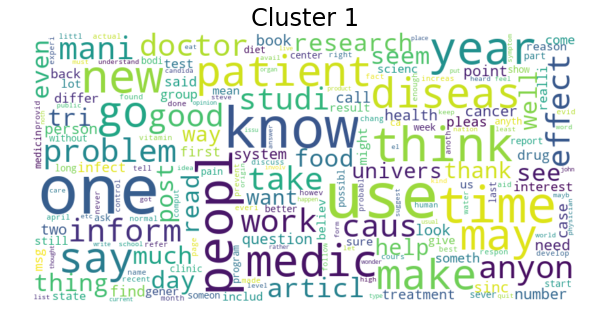

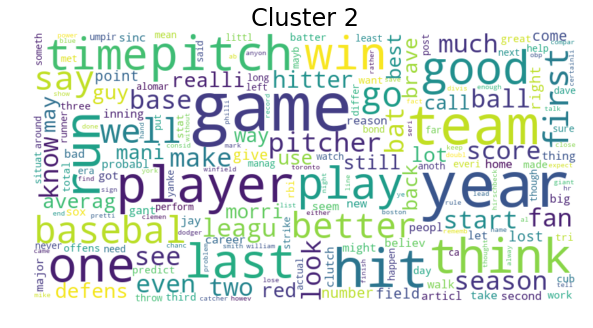

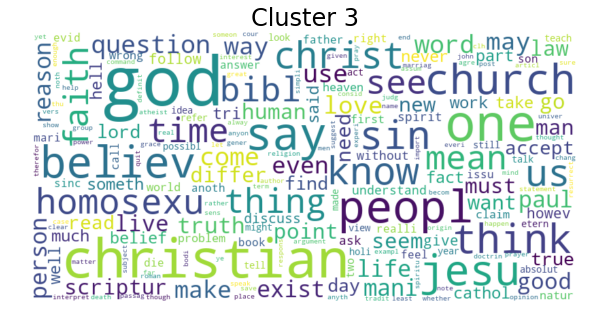

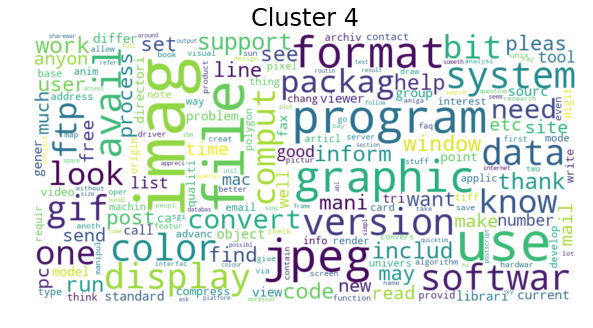

In [14]:
# generating word cloud for each cluster
for iClus in range(max(Y_clus)+1):
    # first, concatenating all texts for that cluster
    allText = ''
    for j,jClus in enumerate(Y_clus):
        if jClus==iClus:  # i.e., text belongs in the cluster
            allText += X_proc[j]
            allText += ' '

    # genrating the word cloud
    wordcloud = WordCloud(max_font_size=100,
                          background_color='white',
                          collocations=False,
                          width=800,
                          height=400).generate(allText)

    # Display the generated image:
    plt.figure(figsize=[10,5])
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title('Cluster ' + str(iClus+1), fontsize=24)
    plt.show()

Please note that words are funny because they are stemmed. We can lemmatize words instead of stemming, but that would involve additional steps (e.g., POS tagging). You are welcome to try that if you have time.